<a href="https://colab.research.google.com/github/XL636/Neural-network-learning-/blob/main/Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) --> Hidden layer1 --> H2 --> output
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [8]:
#Pick a manual seed for randonmization
torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Model().to(device)

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [32]:
# load data
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [33]:
my_df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [34]:
my_df.head(
)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
my_df['species'] = my_df['species'].replace('setosa', 0)
my_df['species'] = my_df['species'].replace('versicolor', 1)
my_df['species'] = my_df['species'].replace('virginica', 2)

/tmp/ipython-input-846874311.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2)


In [36]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [51]:
# Train Test Split, Set X y
X = my_df.drop('species',axis=1)
y = my_df['species']

In [56]:
type(X)

pandas.core.frame.DataFrame

In [57]:
# Convert to numpy arrays
import numpy as np
X = np.array(X)
y = np.array(y)

In [58]:
X.dtype, y.dtype

(dtype('float64'), dtype('int64'))

In [59]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [61]:
# Convert X features to float tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

/tmp/ipython-input-1857162201.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
/tmp/ipython-input-1857162201.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)


In [69]:
X_test[:3],y[:3]

(tensor([[6.1000, 2.8000, 4.7000, 1.2000],
         [5.7000, 3.8000, 1.7000, 0.3000],
         [7.7000, 2.6000, 6.9000, 2.3000]]),
 array([0, 0, 0]))

In [70]:
# Set Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [73]:
#epoches
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # get predict results

  #Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch:{i} and loss: {loss}')

  #
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch:0 and loss: 1.090070128440857
Epoch:10 and loss: 0.9185547828674316
Epoch:20 and loss: 0.762826681137085
Epoch:30 and loss: 0.6290158629417419
Epoch:40 and loss: 0.4747096300125122
Epoch:50 and loss: 0.2991199493408203
Epoch:60 and loss: 0.1778615564107895
Epoch:70 and loss: 0.1122155487537384
Epoch:80 and loss: 0.08272914588451385
Epoch:90 and loss: 0.06954897940158844


Text(0, 0.5, 'Epoch')

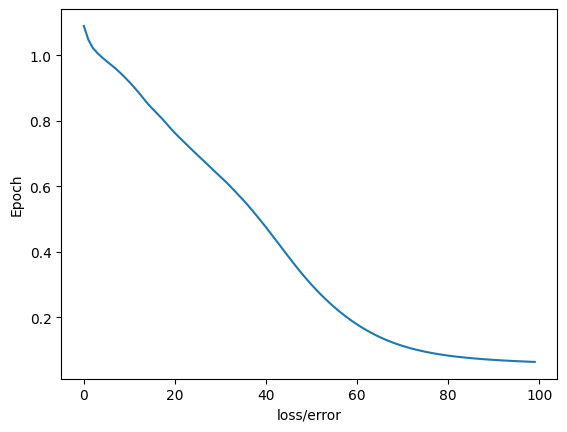

In [74]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.xlabel('loss/error')
plt.ylabel('Epoch')